# NETWORK INTRUSION DETECTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
train = pd.read_table('KDDTrain+.txt',sep=',',header=None)
test = pd.read_table('KDDTest+.txt',sep=',',header=None)

feature_names = ['Duration', 'Protocol Type', 'Service', 'Flag', 'Source Bytes', 'Destination Bytes', 'Land', 'Wrong Fragment', 
                 'Urgent', 'Hot', 'Number Failed Logins', 'Login', 'Num compromised', 'Root Shell', 'Su attempted', 'Num root', 'Num file creations',
                'Num shells', 'Num access files', 'Num outbound cmds', 'Is host login', 'Is guest Login', 'Count', 'Srv Count', 'Serror rate',  'Srv Serror rate',
                'Rerror rate', 'Srv rerror rate', 'Same srv rate', 'Diff srv rate', 'Srv diff host rate', 'Dst host count', 'Dst host srv count', 'Dst host same srv rate',
                'Dst host diff srv rate', 'Dst host same src port rate', 'Dst host diff src host rate', 'Dst host serror rate', 'Dst host srv serror rate', 
                'Dst host rerror rate', 'Dst host srv rerror rate', 'Class Label', 'Difficulty']

train.columns = feature_names
test.columns = feature_names

In [3]:
test.isnull().sum()

Duration                       0
Protocol Type                  0
Service                        0
Flag                           0
Source Bytes                   0
Destination Bytes              0
Land                           0
Wrong Fragment                 0
Urgent                         0
Hot                            0
Number Failed Logins           0
Login                          0
Num compromised                0
Root Shell                     0
Su attempted                   0
Num root                       0
Num file creations             0
Num shells                     0
Num access files               0
Num outbound cmds              0
Is host login                  0
Is guest Login                 0
Count                          0
Srv Count                      0
Serror rate                    0
Srv Serror rate                0
Rerror rate                    0
Srv rerror rate                0
Same srv rate                  0
Diff srv rate                  0
Srv diff h

### Class Restructure

In [4]:
train['Class Label'].nunique()

23

In [5]:
test['Class Label'].nunique()

38

In [6]:
data = pd.concat([train,test],axis=0)

In [7]:
original_data = data.copy()

In [8]:
data['Class Label'].value_counts()

normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
multihop              25
land                  25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
ftp_write             11
loadmodule            11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
udpstorm               2
sqlattack              2
worm                   2
spy                    2


In [9]:
DoS = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'] 
U2R = ['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm']
Probe = ['saint','satan', 'ipsweep', 'nmap', 'portsweep', 'mscan']
R2L = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail',
                        'snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop','httptunnel']

data['Class Label'] = data['Class Label'].replace([i for i in DoS],'DoS')
data['Class Label'] = data['Class Label'].replace([i for i in U2R],'Priviledge Escalations(U2R)')
data['Class Label'] = data['Class Label'].replace([i for i in Probe],'Probe')
data['Class Label'] = data['Class Label'].replace([i for i in R2L],'Remote Access(R2L)')

In [10]:
data['Class Label'].value_counts()

normal                         77054
DoS                            53387
Probe                          14077
Remote Access(R2L)              3880
Priviledge Escalations(U2R)      119
Name: Class Label, dtype: int64

In [11]:
categorical_features = [feature for feature in train if train[feature].dtype == 'object']
numerical_features = [feature for feature in train if train[feature].dtype != 'object']

In [12]:
len(categorical_features)

4

In [13]:
len(numerical_features)

39

In [14]:
restructured_train = data[:train.shape[0]]
restructured_test = data[train.shape[0]:]

In [15]:
restructured_train.shape

(125973, 43)

In [16]:
train.shape

(125973, 43)

In [17]:
restructured_test.shape

(22544, 43)

In [18]:
test.shape

(22544, 43)

In [19]:
data.describe()

,Duration,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,Number Failed Logins,Login,Num compromised,...,Dst host srv count,Dst host same srv rate,Dst host diff srv rate,Dst host same src port rate,Dst host diff src host rate,Dst host serror rate,Dst host srv serror rate,Dst host rerror rate,Dst host srv rerror rate,Difficulty
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### Class Distribution Visualisation

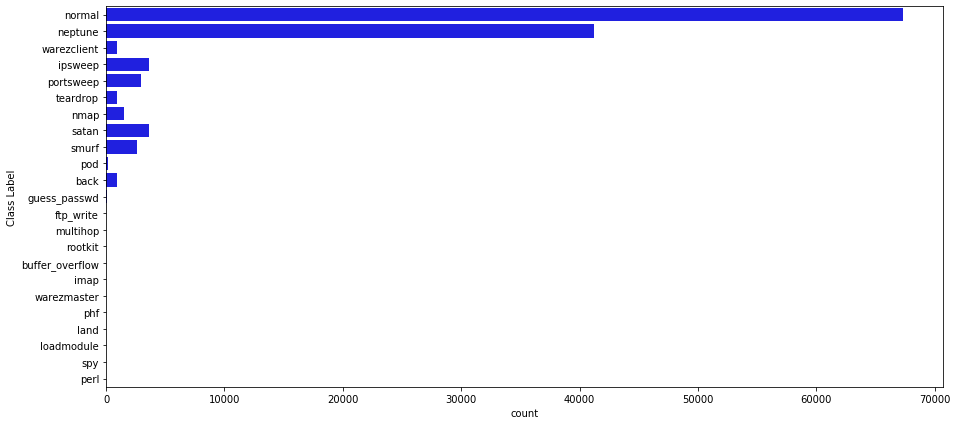

In [20]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data=train,y='Class Label',color='blue')
fig.savefig('class label')

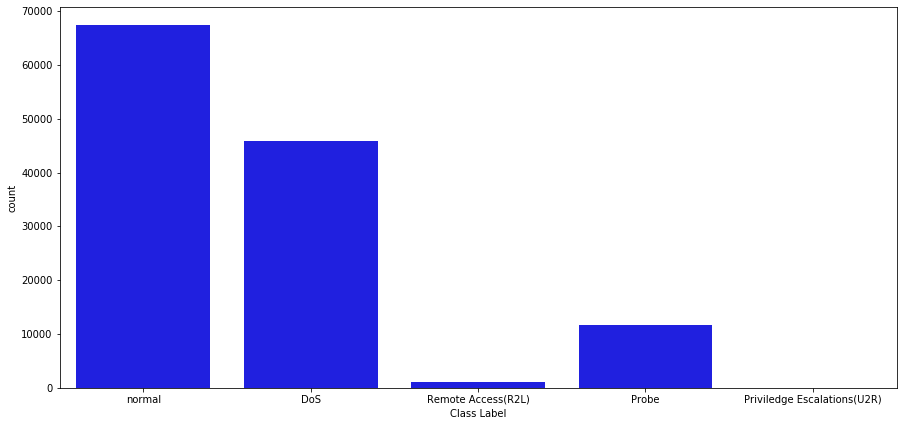

In [21]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data=restructured_train,x='Class Label',color='blue')

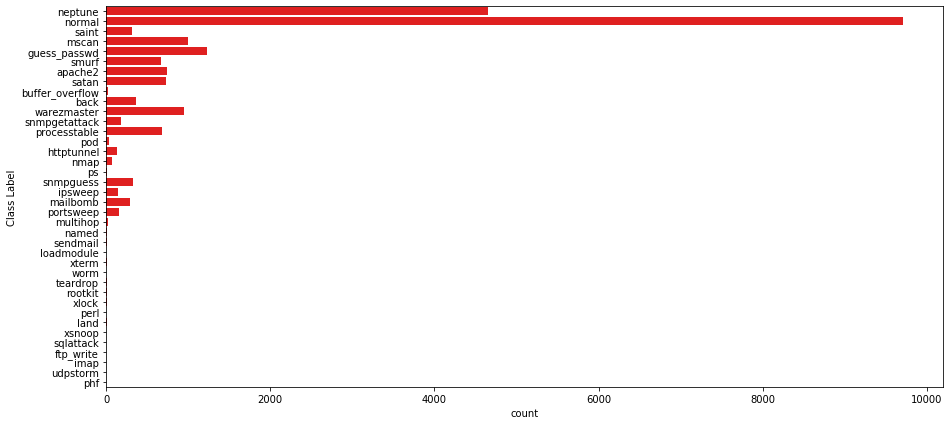

In [22]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data=test,y='Class Label',color='red')

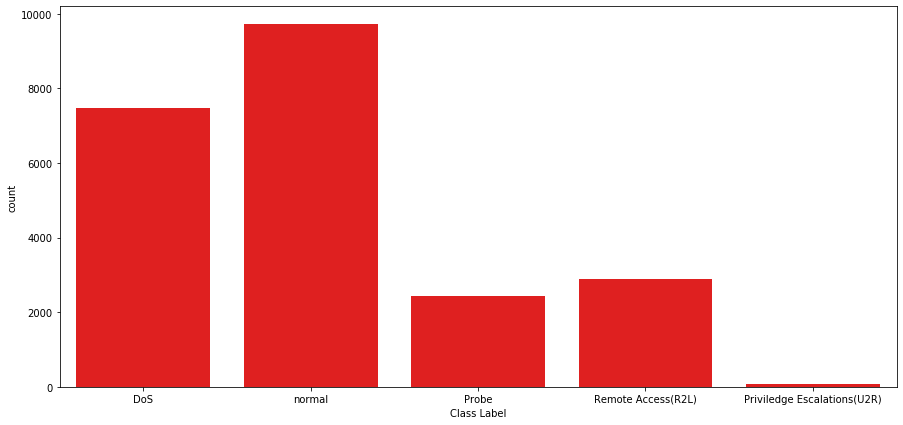

In [23]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data=restructured_test,x='Class Label',color='red')

## Data Preprocessing

In [24]:
class_map = {'normal':0,'DoS':1,'Probe':2,'Remote Access(R2L)':3,'Priviledge Escalations(U2R)':4}
data['Class Label'] = data['Class Label'].map(class_map)

In [25]:
data['Class Label'].value_counts()

0    77054
1    53387
2    14077
3     3880
4      119
Name: Class Label, dtype: int64

In [26]:
def correl(data):
    corr = data.corr()
    results = corr['Class Label'].sort_values(ascending=False)
    
    return results

In [27]:
df_corr_1 = pd.DataFrame(correl(data))
corr_1 = df_corr_1.reset_index().rename(columns={'index':'Features','Class Label':'Correlation'})
corr_1

,Features,Correlation
0,Class Label,1.000000
1,Dst host diff srv rate,0.355136
2,Dst host srv rerror rate,0.296129
3,Rerror rate,0.295723
4,Count,0.294708
5,Srv rerror rate,0.294564
6,Dst host srv serror rate,0.289412
7,Dst host serror rate,0.287254
8,Serror rate,0.285252
9,Diff srv rate,0.284839


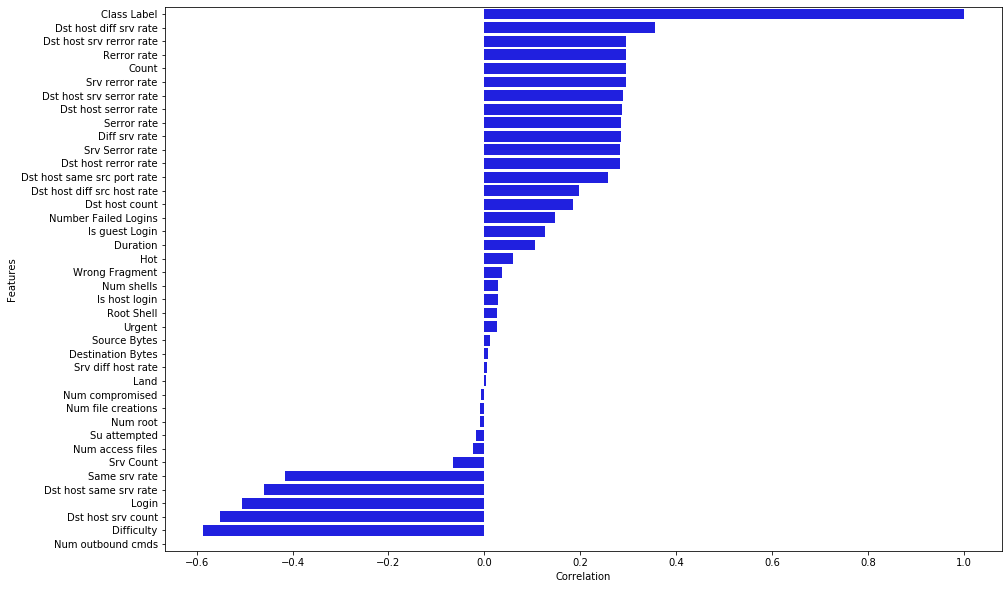

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(data=corr_1,x='Correlation',y='Features',color='blue')

### Handling Categorical Features

In [29]:
for col in categorical_features:
    print(col)
    print(train[col].unique(),'\n')

Protocol Type
['tcp' 'udp' 'icmp'] 

Service
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] 

Flag
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 

Class Label
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl'] 



## Weight Encoding

In [30]:
data_service = data['Service'].value_counts()/data['Service'].value_counts().sum()
data_service_map = dict(data_service)

data['Service'] = data['Service'].map(data_service_map) 

In [31]:
correl(data)

Class Label                    1.000000
Dst host diff srv rate         0.355136
Dst host srv rerror rate       0.296129
Rerror rate                    0.295723
Count                          0.294708
Srv rerror rate                0.294564
Dst host srv serror rate       0.289412
Dst host serror rate           0.287254
Serror rate                    0.285252
Diff srv rate                  0.284839
Srv Serror rate                0.283507
Dst host rerror rate           0.282439
Dst host same src port rate    0.258172
Dst host diff src host rate    0.196964
Dst host count                 0.184508
Number Failed Logins           0.146847
Is guest Login                 0.125675
Duration                       0.104965
Hot                            0.059835
Wrong Fragment                 0.036545
Num shells                     0.028765
Is host login                  0.028731
Root Shell                     0.027074
Urgent                         0.025794
Source Bytes                   0.010911


In [32]:
#protocol encoding
protocol_dummies_data = pd.get_dummies(data['Protocol Type']).add_suffix('_Protocol')
data = pd.concat([data,protocol_dummies_data],axis=1).drop('Protocol Type',axis=1)

#flag encoding
flag_dummies_data = pd.get_dummies(data['Flag']).add_suffix('_Flag')
data = pd.concat([data,flag_dummies_data],axis=1).drop('Flag',axis=1)

In [33]:
correl(data)

Class Label                    1.000000
Dst host diff srv rate         0.355136
Dst host srv rerror rate       0.296129
Rerror rate                    0.295723
Count                          0.294708
Srv rerror rate                0.294564
Dst host srv serror rate       0.289412
Dst host serror rate           0.287254
Serror rate                    0.285252
Diff srv rate                  0.284839
Srv Serror rate                0.283507
Dst host rerror rate           0.282439
S0_Flag                        0.277341
Dst host same src port rate    0.258172
icmp_Protocol                  0.232432
REJ_Flag                       0.199861
RSTR_Flag                      0.198953
Dst host diff src host rate    0.196964
Dst host count                 0.184508
Number Failed Logins           0.146847
Is guest Login                 0.125675
Duration                       0.104965
RSTO_Flag                      0.087569
SH_Flag                        0.085982
Hot                            0.059835


### Handling Numerical Features

In [34]:
data[['Num compromised',
  'Num root',
 'Num file creations',
 'Count',
 'Srv Count']].describe()

,Num compromised,Num root,Num file creations,Count,Srv Count
count,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,0.255062,0.273726,0.012073,83.336561,28.251937
std,22.231375,22.689023,0.517863,116.760741,75.369635
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,13.000000,7.000000
75%,0.000000,0.000000,0.000000,141.000000,17.000000
max,7479.000000,7468.000000,100.000000,511.000000,511.000000


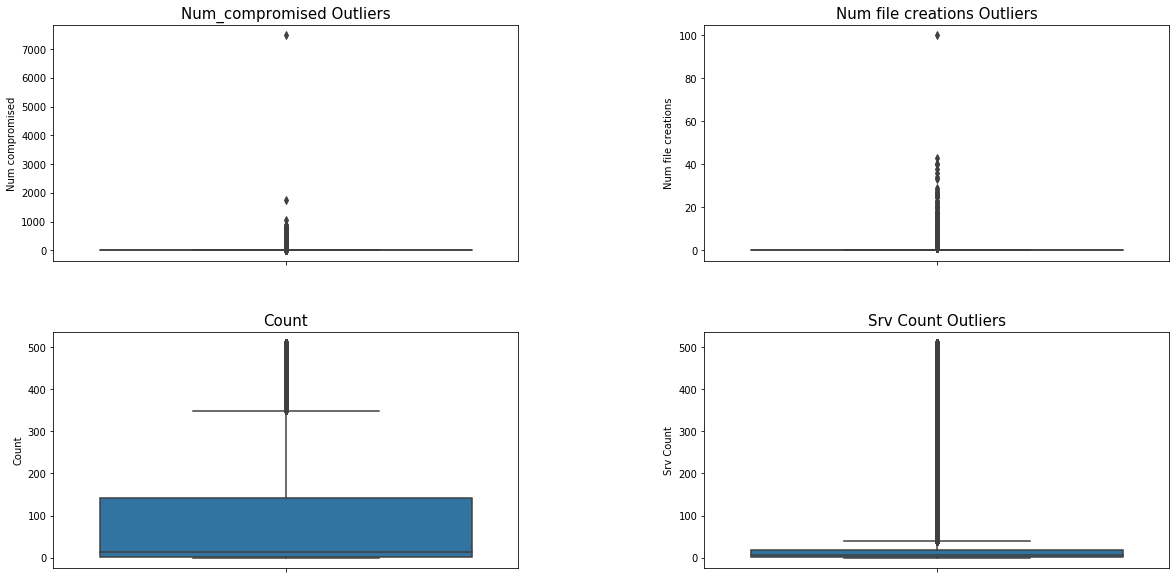

In [35]:
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

fig,ax = plt.subplots(figsize=(20,10))

plt.subplot(grid[0, 0])
plt.title('Num_compromised Outliers',size=15)
sns.boxplot(y=data['Num compromised'])

plt.subplot(grid[0, 1])
plt.title('Num file creations Outliers',size=15)
sns.boxplot(y=data['Num file creations'])

plt.subplot(grid[1, 0])
plt.title('Count',size=15)
sns.boxplot(y=data['Count'])

plt.subplot(grid[1, 1])
plt.title('Srv Count Outliers',size=15)
sns.boxplot(y=data['Srv Count'])

fig.savefig('top_outliers')

## Perform Outlier Analysis

In [36]:
len(data)

148517

In [37]:
len(data[data['Count']>400]['Class Label'])

3959

In [38]:
len(data[data['Srv Count']>50]['Class Label'])

12927

In [39]:
len(data[data['Num compromised']>100]['Class Label'])

60

In [40]:
len(data[data['Num file creations']>5]['Class Label'])

75

In [41]:
def get_quartiles(column):
    q1, q3 = np.percentile(data[column], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    return lower_bound,upper_bound

In [42]:
def log_adjust(column):
    
    fill = []
    
    b1,b2 = get_quartiles(column)
    for i in data[column]:
        if i>b2:
            fill.append(np.log(i))
        else:
            fill.append(i)
            
    return fill        

In [43]:
b1,b2 = get_quartiles('Count')
len(data[data['Count']>b2])/len(data) * 100

2.9915767218567573

In [44]:
b1,b2 = get_quartiles('Srv Count')
len(data[data['Srv Count']>b2])/len(data) * 100

10.13015345044675

In [45]:
b1,b2 = get_quartiles('Num compromised')
len(data[data['Num compromised']>b2])/len(data) * 100

1.1143505457287717

In [46]:
b1,b2 = get_quartiles('Num file creations')
len(data[data['Num file creations']>b2])/len(data) * 100

0.22152346196058362

In [47]:
data[data['Count']>400]['Class Label'].value_counts()

1    1838
2    1653
0     468
Name: Class Label, dtype: int64

In [48]:
data[data['Srv Count']>50]['Class Label'].value_counts()

0    8703
1    3859
2     355
3      10
Name: Class Label, dtype: int64

In [49]:
data[data['Num compromised']>100]['Class Label'].value_counts()

0    59
4     1
Name: Class Label, dtype: int64

In [50]:
data[data['Num file creations']>5]['Class Label'].value_counts()

0    71
4     2
3     1
2     1
Name: Class Label, dtype: int64

In [51]:
data['Log_num_compromised'] = log_adjust('Num compromised')
data['Count'] = log_adjust('Count')
data['Log_Srv_count'] = log_adjust('Srv Count')
data['Log_file_creations'] = log_adjust('Num file creations')

In [52]:
data.drop(['Num compromised','Count','Srv Count','Num file creations'],axis=1,inplace=True)

In [53]:
correl(data)

Class Label                    1.000000
Dst host diff srv rate         0.355136
Dst host srv rerror rate       0.296129
Rerror rate                    0.295723
Srv rerror rate                0.294564
Dst host srv serror rate       0.289412
Dst host serror rate           0.287254
Serror rate                    0.285252
Diff srv rate                  0.284839
Srv Serror rate                0.283507
Dst host rerror rate           0.282439
S0_Flag                        0.277341
Dst host same src port rate    0.258172
icmp_Protocol                  0.232432
REJ_Flag                       0.199861
RSTR_Flag                      0.198953
Dst host diff src host rate    0.196964
Dst host count                 0.184508
Number Failed Logins           0.146847
Is guest Login                 0.125675
Duration                       0.104965
RSTO_Flag                      0.087569
SH_Flag                        0.085982
Hot                            0.059835
RSTOS0_Flag                    0.046805


## Improved Correlation Matrix

In [54]:
df_corr = pd.DataFrame(correl(data))
corr = df_corr.reset_index().rename(columns={'index':'Features','Class Label':'Correlation'})
corr

,Features,Correlation
0,Class Label,1.000000
1,Dst host diff srv rate,0.355136
2,Dst host srv rerror rate,0.296129
3,Rerror rate,0.295723
4,Srv rerror rate,0.294564
5,Dst host srv serror rate,0.289412
6,Dst host serror rate,0.287254
7,Serror rate,0.285252
8,Diff srv rate,0.284839
9,Srv Serror rate,0.283507


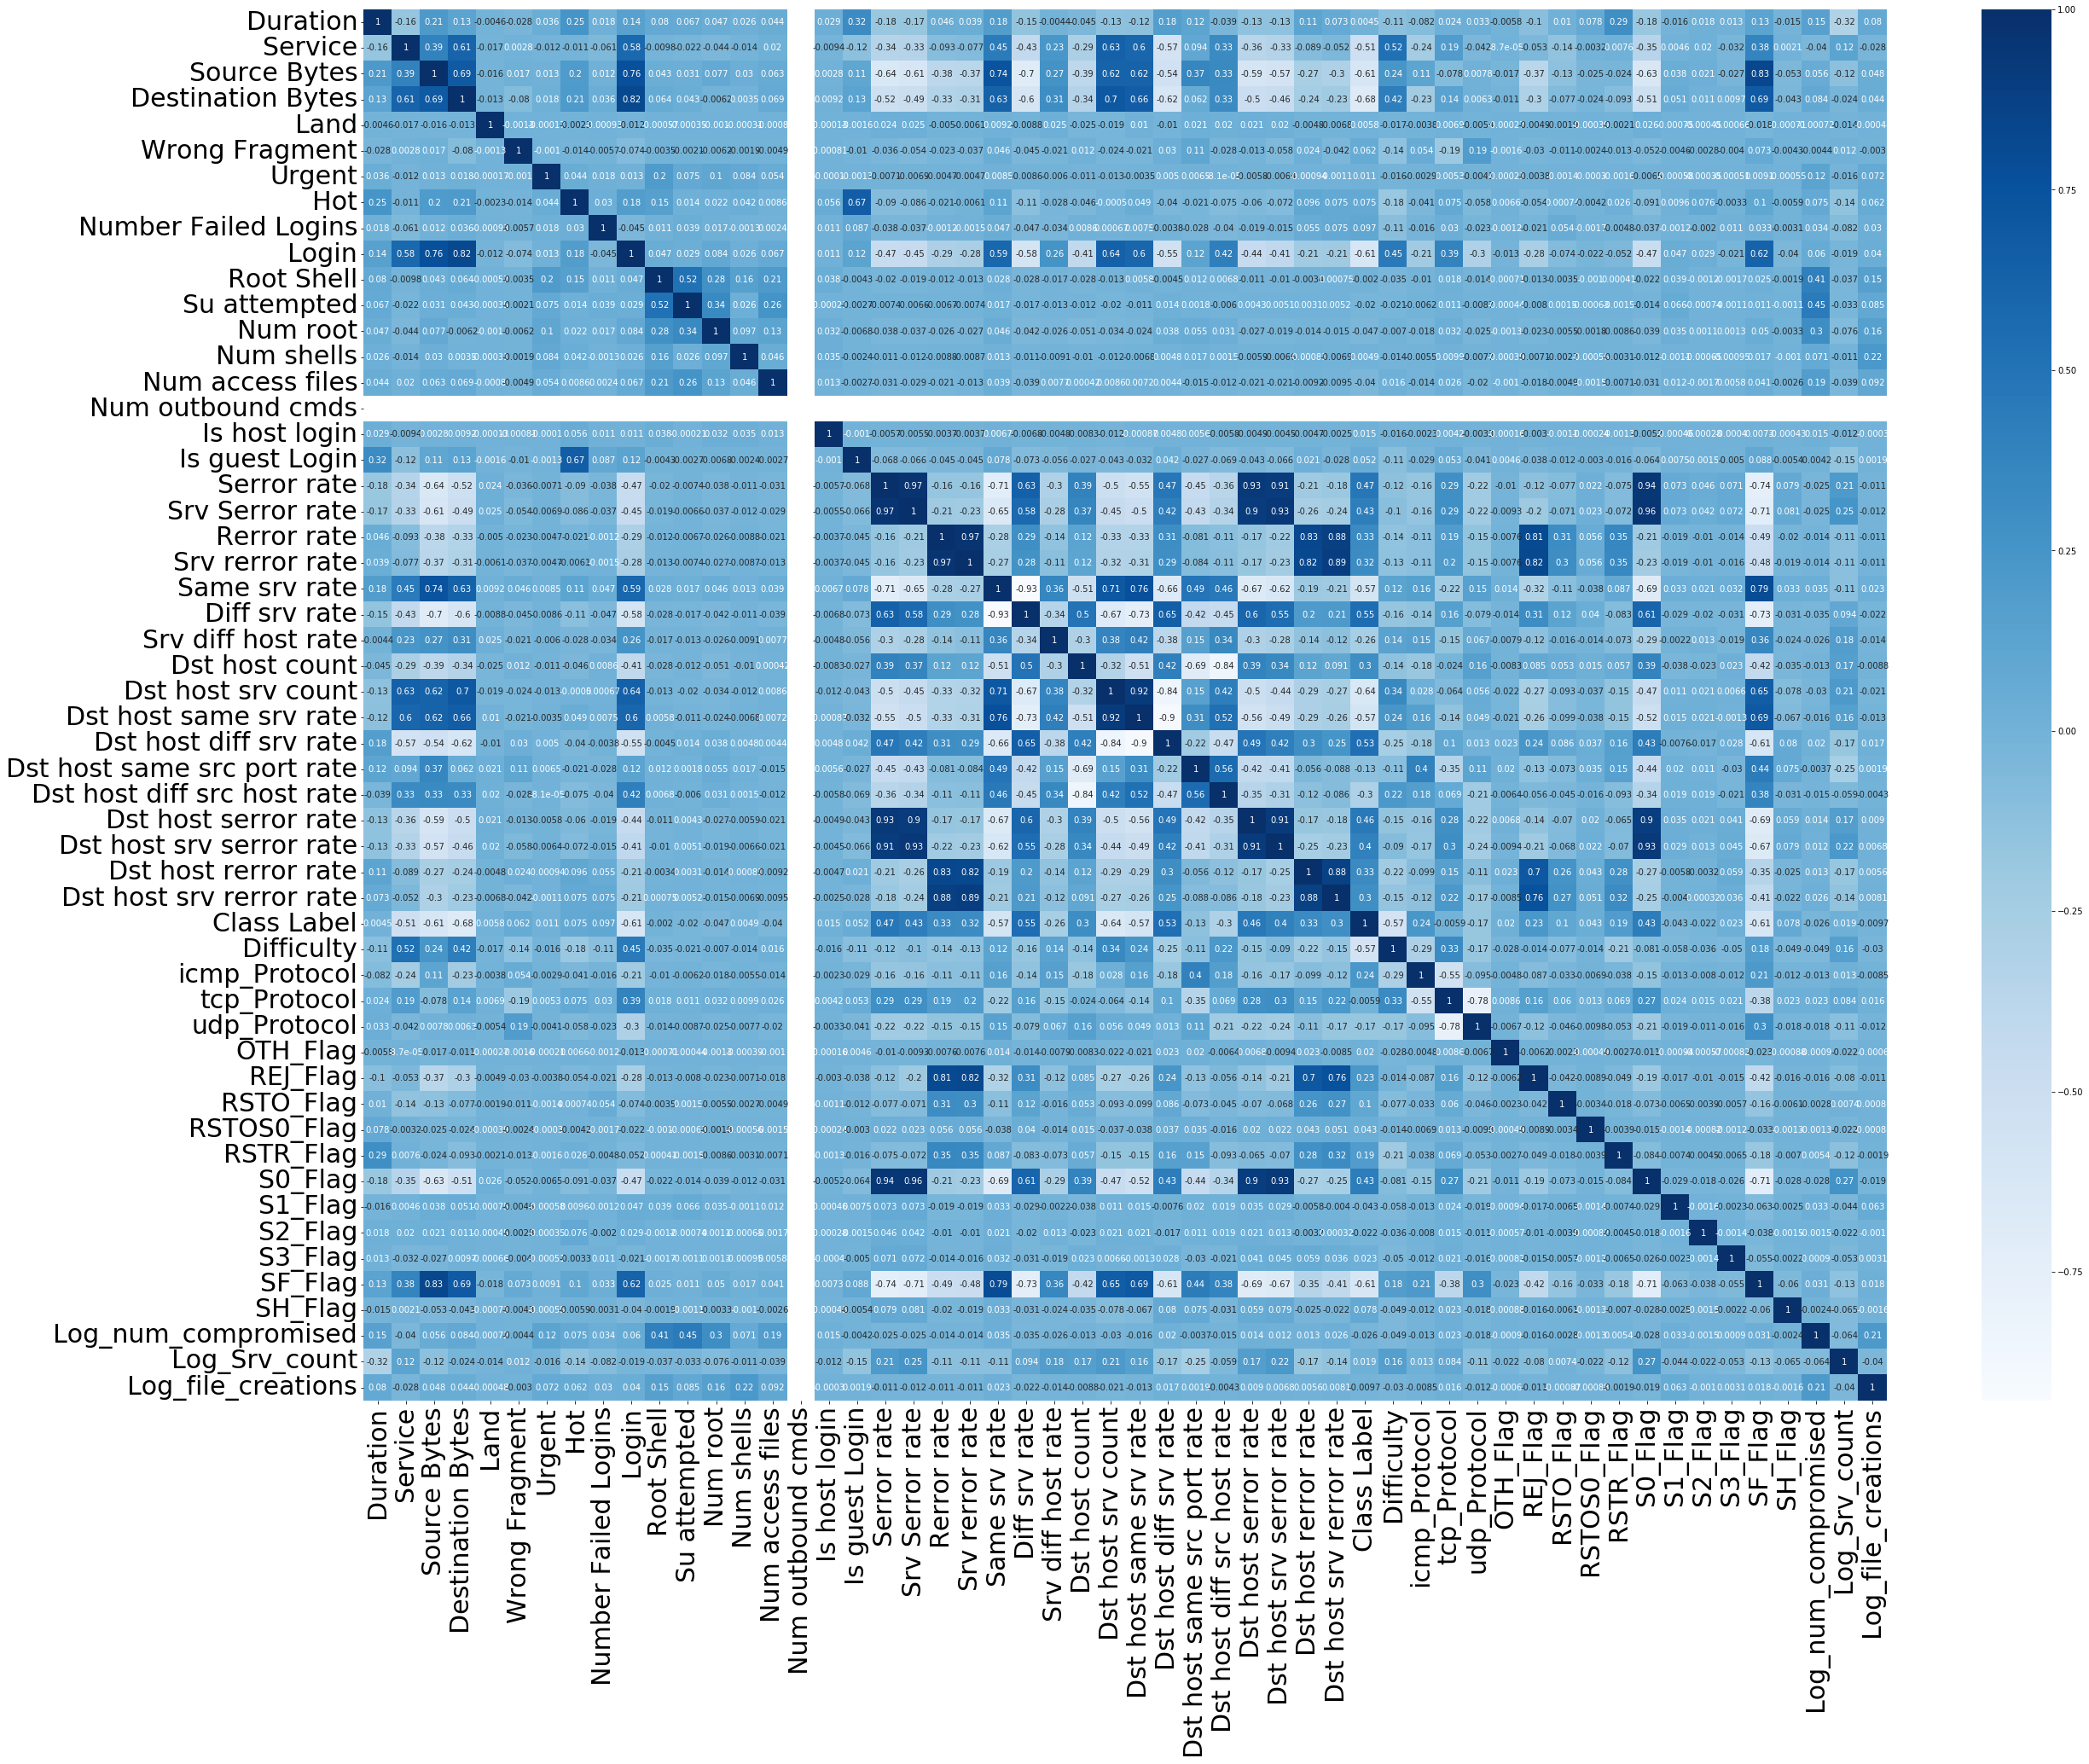

In [55]:
fig,ax = plt.subplots(figsize=(40,30))

sns.heatmap(data.corr(method='spearman'),annot=True,cmap='Blues')
plt.xticks(size=30)
plt.yticks(size=30)

fig.savefig('correlation_matrix')

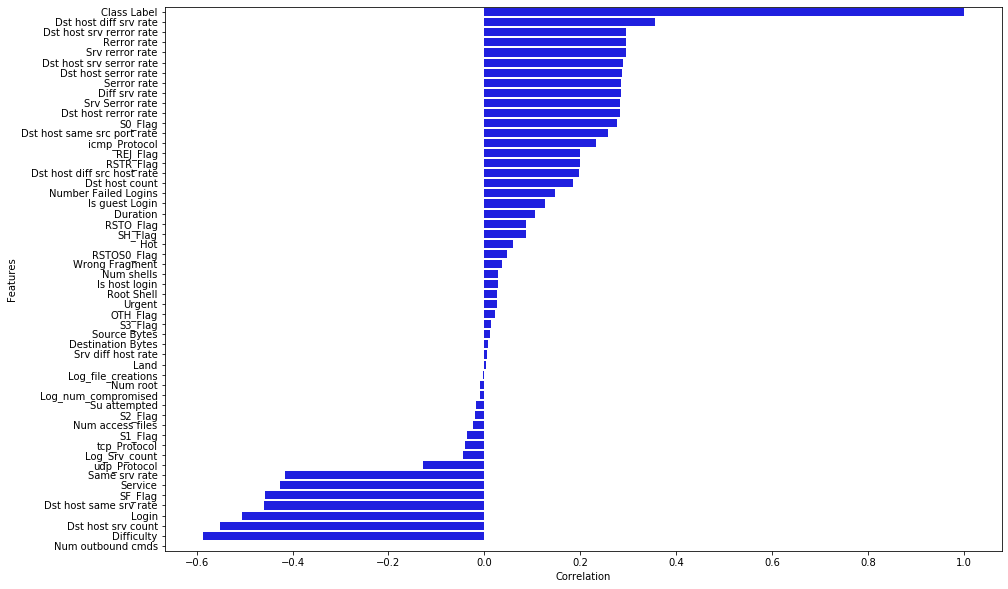

In [56]:
fig,ax = plt.subplots(figsize=(15,10))
sns.barplot(data=corr,x='Correlation',y='Features',color='blue')

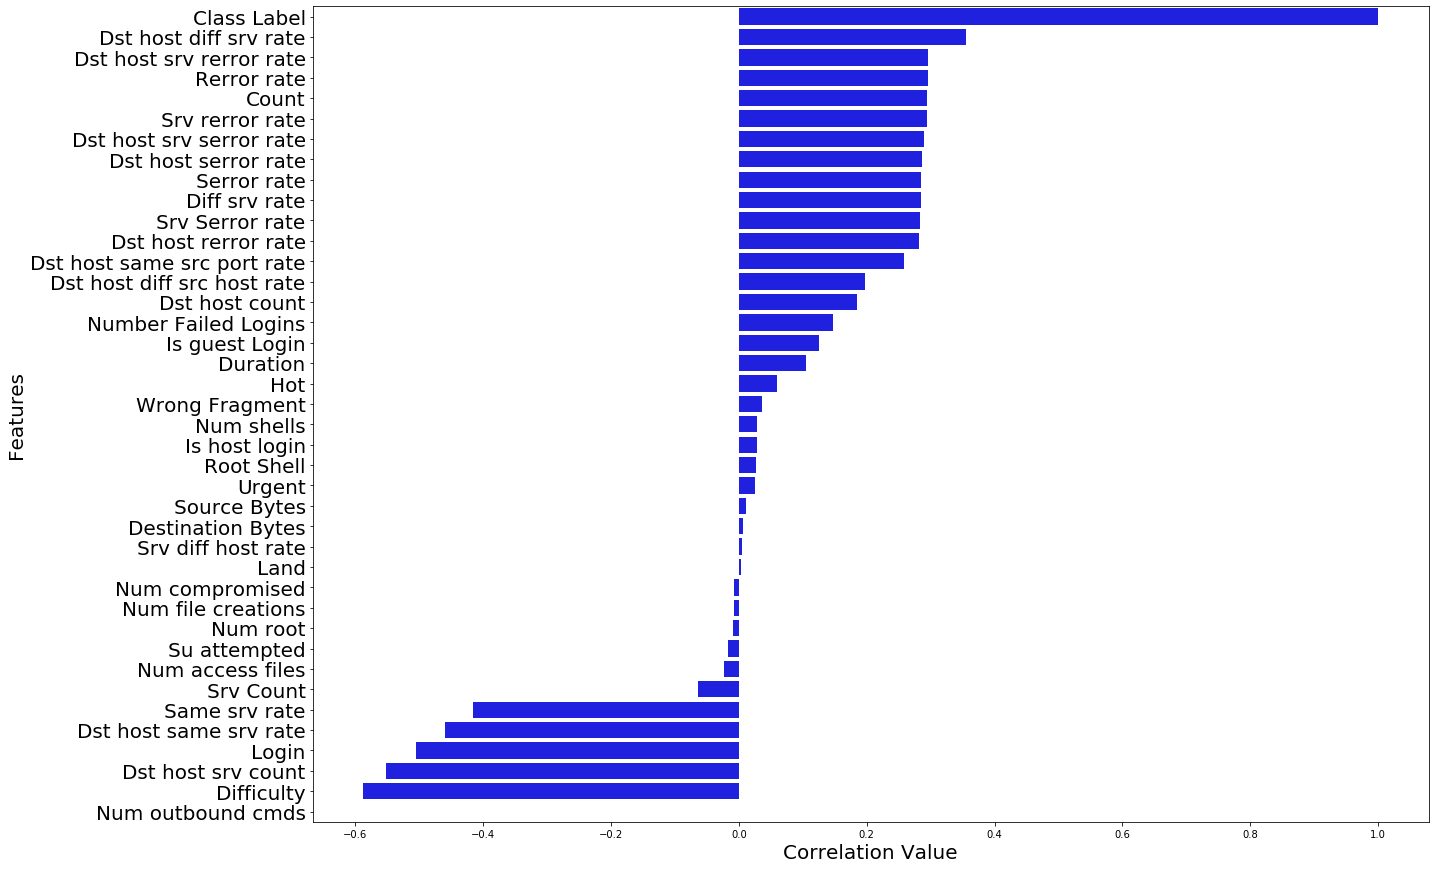

In [57]:
fig,ax = plt.subplots(figsize=(20,15))
sns.barplot(data=corr_1,x='Correlation',y='Features',color='blue')
plt.yticks(size=20)
plt.xlabel('Correlation Value',size=20)
plt.ylabel('Features',size=20)
fig.savefig('correlation_before')

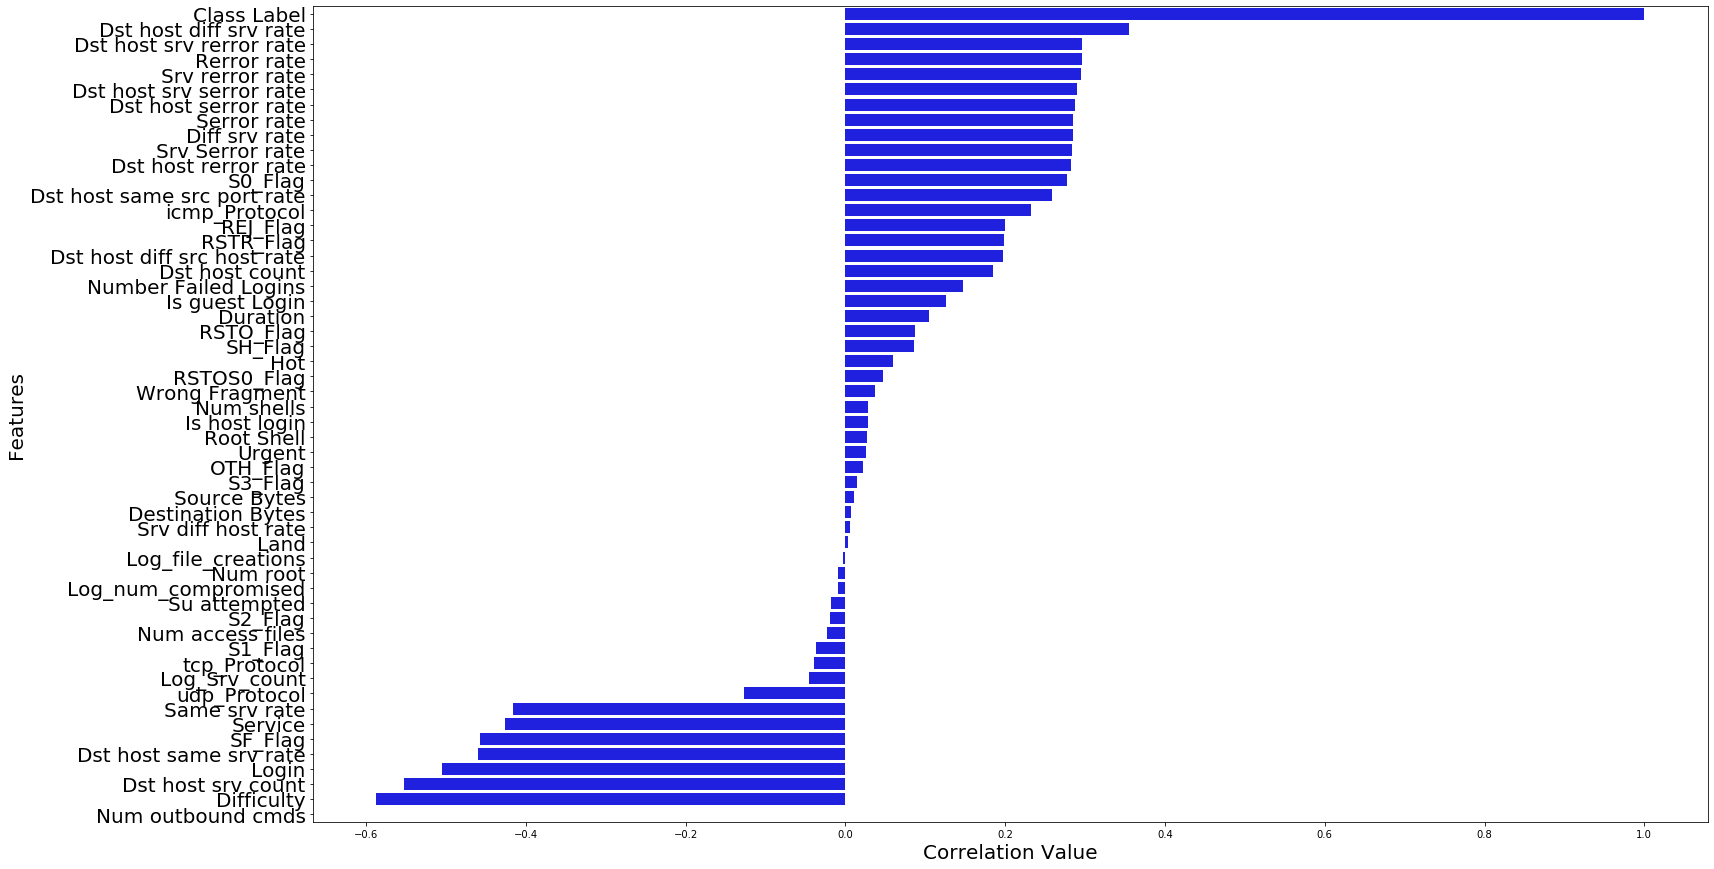

In [58]:
fig,ax = plt.subplots(figsize=(25,15))
sns.barplot(data=corr,x='Correlation',y='Features',color='blue')
plt.yticks(size=20)
plt.xlabel('Correlation Value',size=20)
plt.ylabel('Features',size=20)
fig.savefig('Correlation After')

### Modelling

In [59]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.fillna(0)

In [60]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score
import xgboost as xgb
import lightgbm as lgb

In [61]:
new_train = data[:train.shape[0]]
new_test = data[train.shape[0]:]

In [62]:
new_test.shape

(22544, 54)

In [63]:
new_train.shape

(125973, 54)

In [64]:
target = new_train['Class Label']
X = new_train.drop(['Class Label'], axis=1)

In [65]:
test_target = new_test['Class Label']
test_data = new_test.drop(['Class Label'], axis=1)

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X.values, target.values, random_state=16)

In [67]:
X_train.shape

(94479, 53)

In [68]:
y_train.shape

(94479,)

In [69]:
X_test.shape

(31494, 53)

In [70]:
y_test.shape

(31494,)

In [71]:
test_target.value_counts()

0    9711
1    7460
3    2885
2    2421
4      67
Name: Class Label, dtype: int64

## Fit Check

In [72]:
def fitting(model):
    
    train_score= model.score(X_train,y_train)
    test_score= model.score(X_test,y_test)
    
    print('Train set score:{:.3f}'.format(train_score))
    print('Test set score:{:.3f}'.format(test_score))
    
    if (train_score-test_score) >= 0.1:
        print('Model is overfitted')
    elif (train_score-test_score) < 0: 
        print('Model is underfitted')
    else:
        print('Proper fit prediction')

## Logistic Regression

In [73]:
pipe_lr = make_pipeline(MinMaxScaler(),PCA(n_components=40, whiten=True, random_state=0),
                         SelectPercentile(percentile=50),LogisticRegression(C=100,max_iter=1000))

In [74]:
pipe_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=40,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('logisticregression',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=F

In [75]:
pred_test = pipe_lr.predict(X_test)

In [76]:
confusion = confusion_matrix(y_test, pred_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test))

Train Result

Confusion matrix:
[[16382   243   149    27     1]
 [  168 11269    30     0     0]
 [  142    27  2775     2     2]
 [   22     4     2   232     1]
 [    0     0     0     8     8]]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16802
           1       0.98      0.98      0.98     11467
           2       0.94      0.94      0.94      2948
           3       0.86      0.89      0.88       261
           4       0.67      0.50      0.57        16

    accuracy                           0.97     31494
   macro avg       0.88      0.86      0.87     31494
weighted avg       0.97      0.97      0.97     31494



In [77]:
prediction = pipe_lr.predict(test_data)

In [78]:
accuracy_score(test_target,prediction)

0.8173349893541518

In [79]:
fitting(pipe_lr)

Train set score:0.974
Test set score:0.974
Proper fit prediction


In [80]:
confusion = confusion_matrix(test_target,prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,prediction))

Test Result

Confusion matrix:
[[9353   86  262   10    0]
 [ 940 6409  109    2    0]
 [ 188  154 2073    6    0]
 [1516  256  509  566   38]
 [   7    2   12   21   25]]

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      9711
           1       0.93      0.86      0.89      7460
           2       0.70      0.86      0.77      2421
           3       0.94      0.20      0.32      2885
           4       0.40      0.37      0.38        67

    accuracy                           0.82     22544
   macro avg       0.75      0.65      0.65     22544
weighted avg       0.84      0.82      0.79     22544



In [81]:
prediction = pipe_lr.predict(test_data)
confusion = confusion_matrix(prediction,test_target)

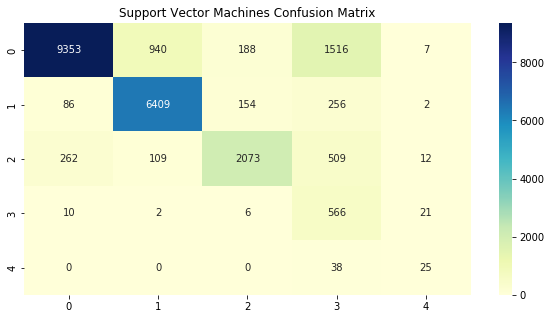

In [82]:
plt.subplots(figsize=(10,5))
plt.title('Logistics Regression Confusion Matrix')
sns.heatmap(confusion,fmt='d',annot=True,cmap='YlGnBu')

## RANDOM FOREST-sealed

In [83]:
pipe_rf = make_pipeline(SelectPercentile(percentile=75),RandomForestClassifier(n_estimators=150,max_depth=20,random_state=16))

In [84]:
pipe_rf.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=None,
                                        oob_score=False, random_state=16,
                            

In [85]:
pred_test = pipe_rf.predict(X_test)

In [86]:
confusion = confusion_matrix(pred_test,y_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test))

Train Result

Confusion matrix:
[[16792     5     1     2     1]
 [    3 11460     0     1     0]
 [    0     2  2947     0     2]
 [    7     0     0   256     2]
 [    0     0     0     2    11]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16802
           1       1.00      1.00      1.00     11467
           2       1.00      1.00      1.00      2948
           3       0.97      0.98      0.97       261
           4       0.85      0.69      0.76        16

    accuracy                           1.00     31494
   macro avg       0.96      0.93      0.95     31494
weighted avg       1.00      1.00      1.00     31494



In [87]:
rf_prediction = pipe_rf.predict(test_data)

In [88]:
accuracy_score(test_target,rf_prediction)

0.7686745919091554

In [89]:
fitting(pipe_rf)

Train set score:1.000
Test set score:0.999
Proper fit prediction


In [90]:
confusion = confusion_matrix(test_target,rf_prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,rf_prediction))

Test Result

Confusion matrix:
[[9451   57  199    4    0]
 [1368 6061   30    1    0]
 [ 774  168 1479    0    0]
 [2441    0  111  315   18]
 [  21    0    7   16   23]]

              precision    recall  f1-score   support

           0       0.67      0.97      0.80      9711
           1       0.96      0.81      0.88      7460
           2       0.81      0.61      0.70      2421
           3       0.94      0.11      0.20      2885
           4       0.56      0.34      0.43        67

    accuracy                           0.77     22544
   macro avg       0.79      0.57      0.60     22544
weighted avg       0.82      0.77      0.74     22544



In [91]:
prediction = pipe_rf.predict(test_data)
confusion = confusion_matrix(prediction,test_target)

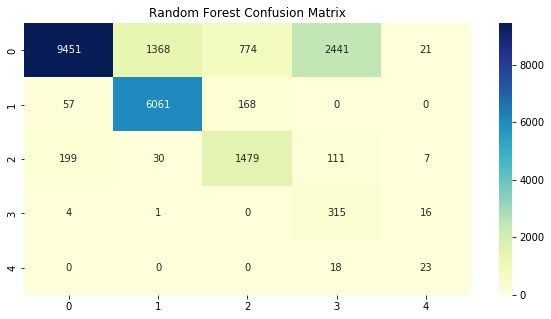

In [92]:
plt.subplots(figsize=(10,5))
plt.title('Random Forest Confusion Matrix')
sns.heatmap(confusion,fmt='d',annot=True,cmap='YlGnBu')

## Gradient Boosting 

In [93]:
pipe_gb = make_pipeline(SelectPercentile(percentile=75),GradientBoostingClassifier(n_estimators = 200,max_depth = 7,learning_rate=0.1,random_state=16))

In [94]:
pipe_gb.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=7, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_esti

In [95]:
pred_test = pipe_gb.predict(X_test)

In [96]:
confusion = confusion_matrix(pred_test,y_test)
print('Train\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test))

Train

Confusion matrix:
[[16792     6     1     8     2]
 [    1 11459     1     0     0]
 [    2     1  2943     0     0]
 [    7     0     0   252     5]
 [    0     1     3     1     9]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16802
           1       1.00      1.00      1.00     11467
           2       1.00      1.00      1.00      2948
           3       0.95      0.97      0.96       261
           4       0.64      0.56      0.60        16

    accuracy                           1.00     31494
   macro avg       0.92      0.91      0.91     31494
weighted avg       1.00      1.00      1.00     31494



In [97]:
gb_prediction = pipe_gb.predict(test_data)

In [98]:
accuracy_score(test_target,gb_prediction)

0.7795865862313698

In [99]:
fitting(pipe_gb)

Train set score:1.000
Test set score:0.999
Proper fit prediction


In [100]:
confusion = confusion_matrix(test_target,gb_prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,gb_prediction))

Test Result

Confusion matrix:
[[9429   58  214    2    8]
 [1189 6196   63   10    2]
 [ 708  169 1538    1    5]
 [1891    2  474  384  134]
 [   9    1   14   15   28]]

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      9711
           1       0.96      0.83      0.89      7460
           2       0.67      0.64      0.65      2421
           3       0.93      0.13      0.23      2885
           4       0.16      0.42      0.23        67

    accuracy                           0.78     22544
   macro avg       0.69      0.60      0.57     22544
weighted avg       0.82      0.78      0.75     22544



In [101]:
prediction = pipe_rf.predict(test_data)
confusion = confusion_matrix(prediction,test_target)

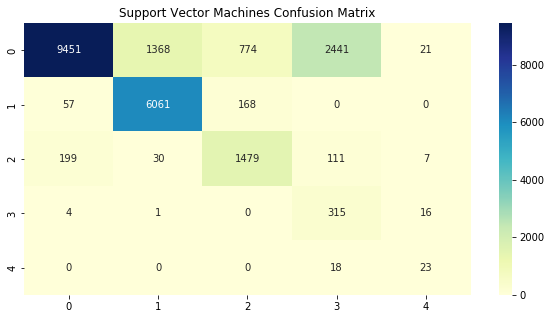

In [102]:
plt.subplots(figsize=(10,5))
plt.title('Support Vector Machines Confusion Matrix')
sns.heatmap(confusion,fmt='d',annot=True,cmap='YlGnBu')

## XGBOOST

In [103]:
pipe_xgb = make_pipeline(SelectPercentile(percentile=75),xgb.XGBClassifier(n_estimators=200,learning_rate=0.5,max_depth=5,random_state=16))

In [104]:
pipe_xgb.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_i...y='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.5, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_e

In [105]:
pred_test = pipe_xgb.predict(X_test)

In [106]:
confusion = confusion_matrix(pred_test,y_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test))

Train Result

Confusion matrix:
[[16793     4     1     3     1]
 [    1 11462     0     1     0]
 [    1     1  2947     1     0]
 [    7     0     0   254     1]
 [    0     0     0     2    14]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16802
           1       1.00      1.00      1.00     11467
           2       1.00      1.00      1.00      2948
           3       0.97      0.97      0.97       261
           4       0.88      0.88      0.88        16

    accuracy                           1.00     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       1.00      1.00      1.00     31494



In [107]:
xgb_prediction = pipe_xgb.predict(test_data)

In [108]:
accuracy_score(test_target,xgb_prediction)

0.7966199432221434

In [109]:
fitting(pipe_xgb)

Train set score:1.000
Test set score:0.999
Proper fit prediction


In [110]:
confusion = confusion_matrix(test_target,prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,prediction))

Test Result

Confusion matrix:
[[9451   57  199    4    0]
 [1368 6061   30    1    0]
 [ 774  168 1479    0    0]
 [2441    0  111  315   18]
 [  21    0    7   16   23]]

              precision    recall  f1-score   support

           0       0.67      0.97      0.80      9711
           1       0.96      0.81      0.88      7460
           2       0.81      0.61      0.70      2421
           3       0.94      0.11      0.20      2885
           4       0.56      0.34      0.43        67

    accuracy                           0.77     22544
   macro avg       0.79      0.57      0.60     22544
weighted avg       0.82      0.77      0.74     22544



In [111]:
prediction = pipe_xgb.predict(test_data)
confusion = confusion_matrix(prediction,test_target)

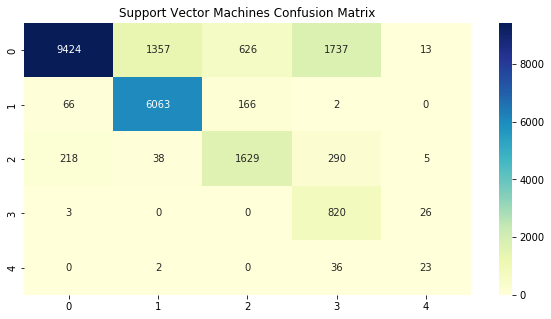

In [112]:
plt.subplots(figsize=(10,5))
plt.title('Support Vector Machines Confusion Matrix')
sns.heatmap(confusion,fmt='d',annot=True,cmap='YlGnBu')

## LIGHTGBM

In [113]:
pipe_lgb = make_pipeline(SelectPercentile(percentile=75),lgb.LGBMClassifier(num_iterations=150,
                                            max_depth=3,learning_rate=0.1,random_state=16))


In [114]:
pipe_lgb.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('lgbmclassifier',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=3,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_iterations=150, num_leaves=31,
                                objective=None, random_state=16, reg_alpha=0.0,
                                reg_lambda=0.0, silent='warn', subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [115]:
pred_test = pipe_lgb.predict(X_test)

In [116]:
confusion = confusion_matrix(pred_test,y_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test))

Train Result

Confusion matrix:
[[16767    10     5    10     6]
 [    5 11452     0     1     1]
 [    9     1  2936     1     2]
 [   13     0     0   240     1]
 [    8     4     7     9     6]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16802
           1       1.00      1.00      1.00     11467
           2       1.00      1.00      1.00      2948
           3       0.94      0.92      0.93       261
           4       0.18      0.38      0.24        16

    accuracy                           1.00     31494
   macro avg       0.82      0.86      0.83     31494
weighted avg       1.00      1.00      1.00     31494



In [117]:
lgb_prediction = pipe_lgb.predict(test_data)

In [118]:
accuracy_score(test_target,lgb_prediction)

0.7845546486870121

In [119]:
fitting(pipe_lgb)

Train set score:0.998
Test set score:0.997
Proper fit prediction


In [120]:
confusion = confusion_matrix(test_target,lgb_prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,lgb_prediction))

Test Result

Confusion matrix:
[[9379   67  252    8    5]
 [1222 5867   35  335    1]
 [ 583  318 1511    2    7]
 [1404  154  174  903  250]
 [  30    1    1    8   27]]

              precision    recall  f1-score   support

           0       0.74      0.97      0.84      9711
           1       0.92      0.79      0.85      7460
           2       0.77      0.62      0.69      2421
           3       0.72      0.31      0.44      2885
           4       0.09      0.40      0.15        67

    accuracy                           0.78     22544
   macro avg       0.65      0.62      0.59     22544
weighted avg       0.80      0.78      0.77     22544



In [121]:
prediction = pipe_lgb.predict(test_data)
confusion = confusion_matrix(prediction,test_target)

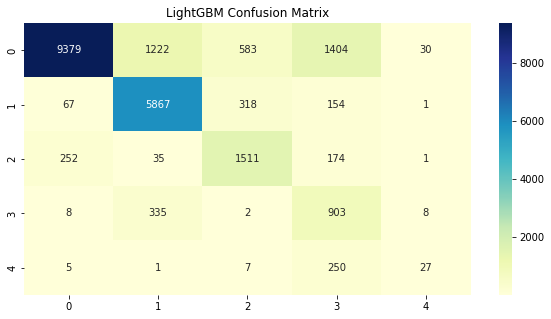

In [122]:
plt.subplots(figsize=(10,5))
plt.title('LightGBM Confusion Matrix')
sns.heatmap(confusion,fmt='d',annot=True,cmap='YlGnBu')

## SVM

In [123]:
pipe_svm = make_pipeline(MinMaxScaler(),
                    SelectPercentile(percentile=50),SVC(C = 10000, gamma = 50, max_iter=1000, 
                                                        random_state=16,probability=True))

In [124]:
pipe_svm.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('svc',
                 SVC(C=10000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=50,
                     kernel='rbf', max_iter=1000, probability=True,
                     random_state=16, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [125]:
pred_test = pipe_svm.predict(X_test)

In [126]:
confusion = confusion_matrix(pred_test,y_test)
print('Train Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(y_test, pred_test))

Train Result

Confusion matrix:
[[16792    34    53    18     6]
 [    2 11433     0     0     0]
 [    1     0  2894     0     0]
 [    6     0     0   241     1]
 [    1     0     1     2     9]]

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16802
           1       1.00      1.00      1.00     11467
           2       1.00      0.98      0.99      2948
           3       0.97      0.92      0.95       261
           4       0.69      0.56      0.62        16

    accuracy                           1.00     31494
   macro avg       0.93      0.89      0.91     31494
weighted avg       1.00      1.00      1.00     31494



In [127]:
svm_prediction = pipe_svm.predict(test_data)

In [128]:
accuracy_score(test_target,svm_prediction)

0.7124290276792051

In [129]:
prediction = pipe_rf.predict(test_data)
confusion = confusion_matrix(prediction,test_target)

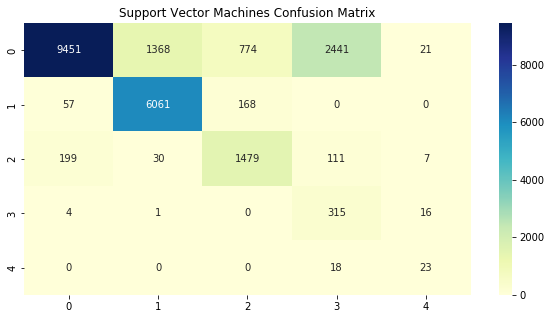

In [130]:
plt.subplots(figsize=(10,5))
plt.title('Support Vector Machines Confusion Matrix')
sns.heatmap(confusion,fmt='d',annot=True,cmap='YlGnBu')

In [131]:
fitting(pipe_svm)

Train set score:1.000
Test set score:0.996
Proper fit prediction


In [132]:
confusion = confusion_matrix(test_target,svm_prediction)
print('Test Result\n')
print("Confusion matrix:\n{}\n".format(confusion))

print(classification_report(test_target,svm_prediction))

Test Result

Confusion matrix:
[[9680   14   16    1    0]
 [2147 5304    8    1    0]
 [1373   11 1037    0    0]
 [2779    0   39   34   33]
 [  54    0    5    2    6]]

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      9711
           1       1.00      0.71      0.83      7460
           2       0.94      0.43      0.59      2421
           3       0.89      0.01      0.02      2885
           4       0.15      0.09      0.11        67

    accuracy                           0.71     22544
   macro avg       0.72      0.45      0.46     22544
weighted avg       0.81      0.71      0.66     22544



## Voting Classifier

In [133]:
from sklearn.ensemble import VotingClassifier

In [134]:
voting_clf = VotingClassifier(estimators=[('xgb',pipe_xgb),('rf',pipe_rf),('gb',pipe_gb),('lgb',pipe_lgb),('svm',pipe_svm)],
                             voting = 'hard')

In [135]:
voting_clf.fit(X_train,y_train)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3

VotingClassifier(estimators=[('xgb',
                              Pipeline(memory=None,
                                       steps=[('selectpercentile',
                                               SelectPercentile(percentile=75,
                                                                score_func=<function f_classif at 0x0000022652FD7DC8>)),
                                              ('xgbclassifier',
                                               XGBClassifier(base_score=0.5,
                                                             booster='gbtree',
                                                             callbacks=None,
                                                             colsample_bylevel=1,
                                                             colsample_bynode=1,
                                                             colsample_bytree=1,
                                                             early_stopping_rounds=None,
              

In [136]:
predict = voting_clf.predict(test_data)

In [137]:
accuracy_score(test_target,predict)

0.7637952448545068

In [138]:
print(confusion_matrix(test_target,predict))

[[9443   62  205    1    0]
 [1416 6011   31    1    1]
 [ 783  164 1474    0    0]
 [2417    0  167  268   33]
 [  30    0    1   13   23]]


In [139]:
print(classification_report(test_target,predict))

              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.96      0.81      0.88      7460
           2       0.78      0.61      0.69      2421
           3       0.95      0.09      0.17      2885
           4       0.40      0.34      0.37        67

    accuracy                           0.76     22544
   macro avg       0.75      0.56      0.58     22544
weighted avg       0.81      0.76      0.73     22544



## Cross Validation

In [140]:
kfold = StratifiedKFold(n_splits =5, shuffle=True, random_state=16)

In [141]:
def validate(model,x,y):
    
    scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
    
    print(model)    
    print(scores)
    print(scores.mean())
    
    result = scores.mean()
    
    return result

In [142]:
train_scores_lr,test_score_lr = validate(pipe_lr,X,target),validate(pipe_lr,test_data,test_target)
train_scores_rf,test_score_rf = validate(pipe_rf,X,target),validate(pipe_rf,test_data,test_target)
train_scores_gb,test_score_gb = validate(pipe_gb,X,target),validate(pipe_gb,test_data,test_target)
train_scores_xgb,test_score_xgb = validate(pipe_xgb,X,target),validate(pipe_xgb,test_data,test_target)
train_scores_lgb,test_score_lgb = validate(pipe_lgb,X,target),validate(pipe_lgb,test_data,test_target)
train_scores_svm,test_score_svm = validate(pipe_svm,X,target),validate(pipe_svm,test_data,test_target)

C:\Users\ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=40,
                     random_state=0, svd_solver='auto', tol=0.0, whiten=True)),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('logisticregression',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=F

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\s

Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=None,
                                        oob_score=False, random_state=16,
                            

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site

Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=20, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=None,
                                        oob_score=False, random_state=16,
                            

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\s

Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=7, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_esti

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site

Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=7, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_esti

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\s

Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_i...y='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.5, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_e

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site

Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_i...y='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.5, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_e

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it inste

Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('lgbmclassifier',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=3,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_iterations=150, num_leaves=31,
                                objective=None, random_state=16, reg_alpha=0.0,
                                reg_lambda=0.0, silent='warn', subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)
[0.99519746 0.98491764 0.99761858 0.99805509 0.99837263]
0.9948

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead 

Pipeline(memory=None,
         steps=[('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('lgbmclassifier',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=3,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_iterations=150, num_leaves=31,
                                objective=None, random_state=16, reg_alpha=0.0,
                                reg_lambda=0.0, silent='warn', subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)
[0.99223775 0.99201597 0.99135063 0.98935462 0.99245785]
0.9914

C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15 16] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('svc',
                 SVC(C=10000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=50,
                     kernel='rbf', max_iter=1000, probability=True,
                     random_state=16, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
[0.99567374 0.99531653 0.99567374 0.99583234 0.99630864]
0.9957610013176103


C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [15] are constant.
  UserWarning)
C:\Users\ben\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\ben\anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function f_classif at 0x0000022652FD7DC8>)),
                ('svc',
                 SVC(C=10000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=50,
                     kernel='rbf', max_iter=1000, probability=True,
                     random_state=16, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
[0.86427146 0.96562431 0.87025948 0.86094478 0.86002662]
0.8842253283042512


In [143]:
eval_result = {'Logistic Regression':[train_scores_lr,test_score_lr],'Random Forest':[train_scores_rf,test_score_rf],
      'Gradient Boosting':[train_scores_gb,test_score_gb],
      'Xgboost':[train_scores_xgb,test_score_xgb],'LightGBM':[train_scores_lgb,test_score_lgb],
      'SVM':[train_scores_svm,test_score_svm],'ANN':[0.998031,0.78375]
     }

df = pd.DataFrame(eval_result)
new_df = df.T
new_df = new_df.rename(columns={0:'Train',1:'Test'})

In [144]:
new_df

,Train,Test
Logistic Regression,0.970406,0.942557
Random Forest,0.999135,0.993435
Gradient Boosting,0.998857,0.993568
Xgboost,0.999174,0.994189
LightGBM,0.994832,0.991483
SVM,0.995761,0.884225
ANN,0.998031,0.783750


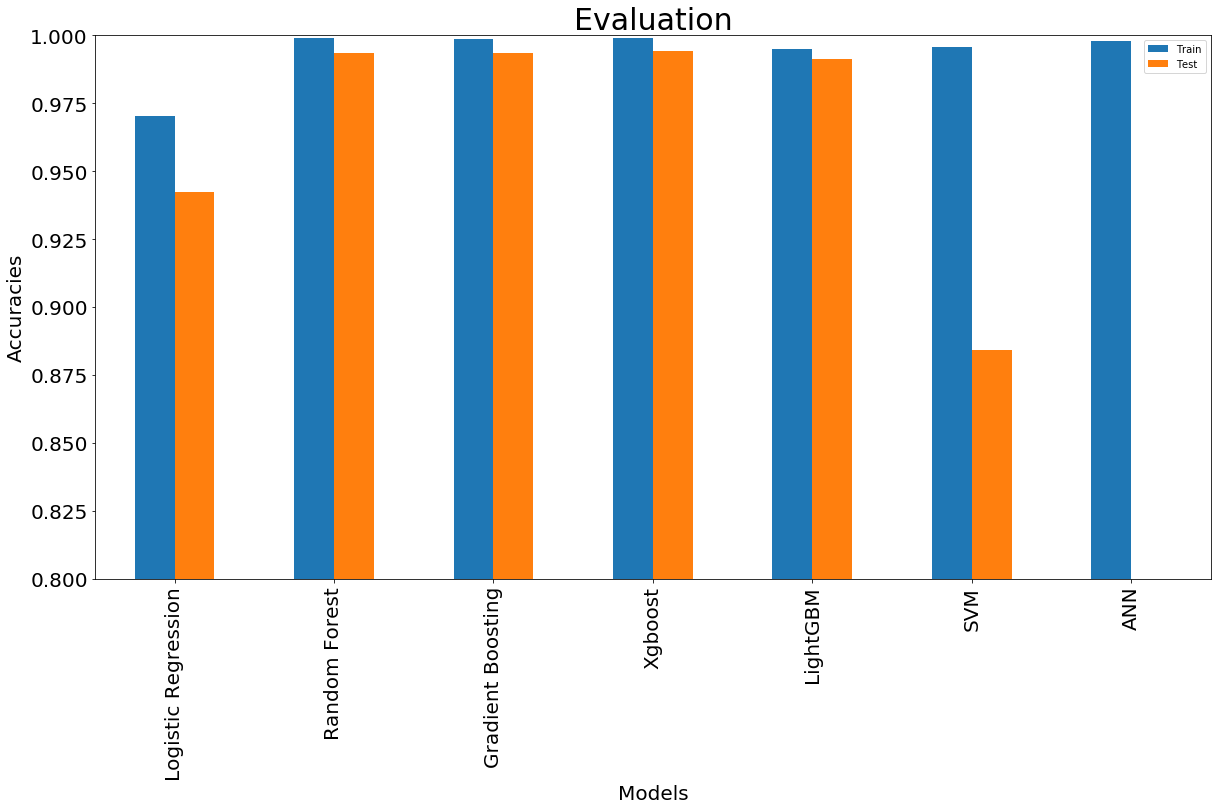

In [145]:
fig,ax = plt.subplots(figsize=(20,10))
new_df.plot(kind='bar',ax=ax,fig = (plt.ylim(0.8,1.0),plt.title('Evaluation',size=30),plt.xlabel('Models',size=20),
                                    plt.xticks(fontsize=20),plt.ylabel('Accuracies',size=20),plt.yticks(fontsize=20)))

fig.savefig('Multiclass Accuracy Evaluation')

In [146]:
eval_result = np.array([[0.96,0.86,0.86,0.20,0.37],[0.97,0.81,0.61,0.11,0.34],[0.97,0.83,0.64,0.13,0.42],
                        [0.96,0.86,0.86,0.20,0.37],[0.97,0.79,0.62,0.31,0.40],[1.00,0.71,0.43,0.01,0.09],
                        [0.97,0.84,0.70,0.10,0.39]])

df = pd.DataFrame(eval_result,columns=['Normal','Dos','Probe','R2L','U2R'],
                  index=['Logistics Regression','Random Forest','Gradient Boosting','Xgboost','LightGBM','SVM','ANN'])

In [147]:
df

,Normal,Dos,Probe,R2L,U2R
Logistics Regression,0.96,0.86,0.86,0.20,0.37
Random Forest,0.97,0.81,0.61,0.11,0.34
Gradient Boosting,0.97,0.83,0.64,0.13,0.42
Xgboost,0.96,0.86,0.86,0.20,0.37
LightGBM,0.97,0.79,0.62,0.31,0.40
SVM,1.00,0.71,0.43,0.01,0.09
ANN,0.97,0.84,0.70,0.10,0.39


In [148]:
df.mean(axis=1)

Logistics Regression    0.650
Random Forest           0.568
Gradient Boosting       0.598
Xgboost                 0.650
LightGBM                0.618
SVM                     0.448
ANN                     0.600
dtype: float64

In [149]:
df.to_excel('Recall.xlsx')

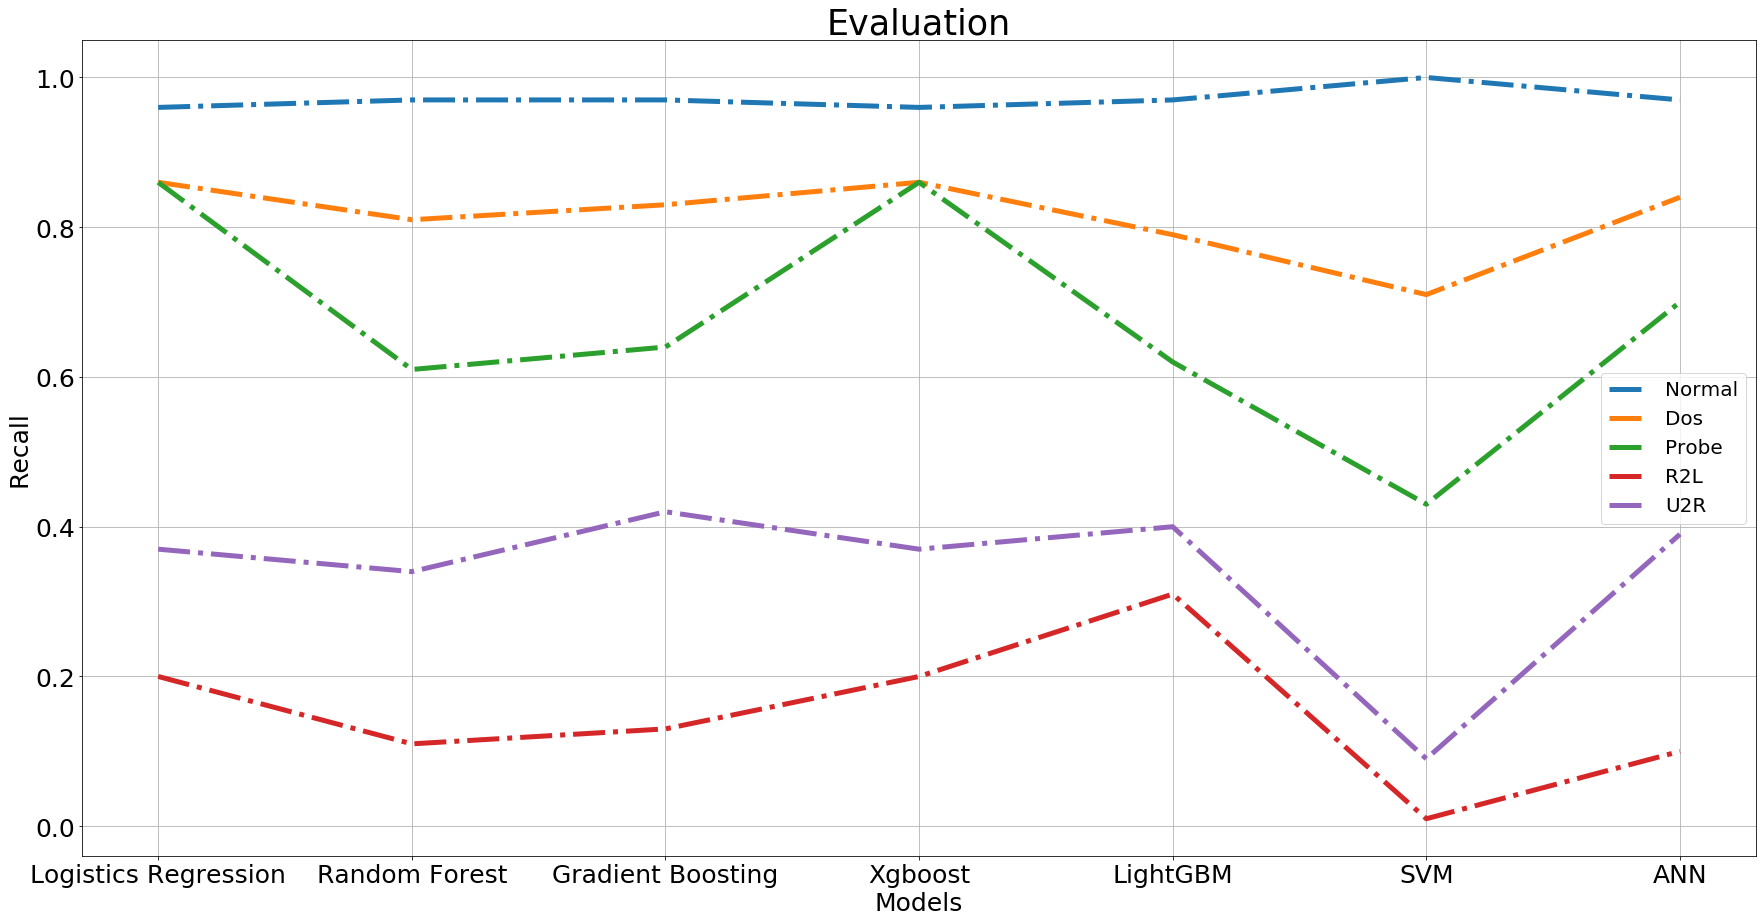

In [150]:
fig,ax = plt.subplots(figsize=(30,15))
df.plot(kind='line',ax=ax,fig = (plt.title('Evaluation',size=35),plt.xlabel('Models',size=25),
                                    plt.xticks(fontsize=20),plt.ylabel('Recall',size=25),plt.yticks(fontsize=20)),
        linewidth=5,linestyle='-.')
plt.grid(True)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc=0,prop={'size':20})
#fig.savefig('Multiclass Recall Evaluation')